In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
path = '/home/andres/Escritorio/OrgaDeDatos'
df= pd.read_csv(path + '/train.csv',nrows=2000)
#Fuente: https://es.investing.com/currencies/usd-mxn-historical-data
#AGREGAR EL PATH CORRESPONDIENTE
path1 = '/home/andres/Escritorio/OrgaDeDatos'
dolar= pd.read_csv(path1 + '/Datos históricos USD_MXN.csv')
dolar.columns = ["fecha", "last", "opening", "max", "min", "std"]
dolar.drop(["std", "opening", "opening", "max", "min"], axis=1 ,inplace=True)
#Paso a formato fecha correctamente y luego creo columnas mes y año
dolar['date'] = pd.to_datetime(dolar['fecha'], format="%b %Y")
dolar.drop(["fecha"], axis=1, inplace=True)
dolar.columns= ['price', "date"]
#El csv ponia los numeros con punto en vez de coma.
dolar['price'] = dolar['price'].replace(',', '.', regex=True).astype(float)
dolar["year"] = dolar.date.dt.year
dolar['month'] = dolar.date.dt.month
dolar.drop(["date"], axis=1, inplace=True)
df['fecha'] = pd.to_datetime(df['fecha'])
df['year'] = df['fecha'].dt.year
df['month']= df['fecha'].dt.month
#Agrego la columna precio en dolar por propiedad, en el dataframe original
newDf= pd.merge(df, dolar, on=['year', 'month'], how='left')
newDf["dollar_price"] = newDf.apply(lambda row: row["precio"]/row["price"], axis=1)
#Filtro dejando las cosas útiles.
#Para agregar una columna, se debe agregar aca y luego agregarla al merge
df = newDf.filter(["id", "tipodepropiedad", "habitaciones",'garages', 'banos', 'ciudad',
                   'provincia','metroscubiertos', 'metrostotales', 'idzona', 'fecha',
                   'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
                   'centroscomercialescercanos','precio', 'dollar_price' ])
def asignarMetros(metroscubiertos, metrostotales):
    if (metroscubiertos != 0 and metrostotales == 0):
        return metroscubiertos
    else:
        return metrostotales
    
#Arreglando, no pueden haber propiedades con metros cubiertos pero sin metros totales
df['metrostotales'].fillna(0, inplace=True)
df['metrostotales'] = df.apply(lambda x: asignarMetros(x['metroscubiertos'],x['metrostotales']),axis=1)
df.head()
#Filtrando el garage, lotes, hospedaje, otros
filtroTerreno = df["tipodepropiedad"].isin(["Huerta", "Nave industrial", "Terreno", "Terreno comercial", 
                                            "Bodega comercial", "Terreno industrial"])
dfTerreno = df[filtroTerreno]
dfTerreno.tipodepropiedad.value_counts()
#Dropeo todos los terrenos que tienen habitaciones ya que si las tienen no serian terrenos.
dfTerreno = dfTerreno[dfTerreno["habitaciones"].isna()]
dfTerreno.tipodepropiedad.value_counts()
#Limpiando las propiedades tipo casa, no pueden no tener al menos una habitacion o baño y no pueden
#tener metros no cubiertos
filtro1 = df["tipodepropiedad"].isin(["Apartamento", "Casa", "Casa en condominio",
                                        "Casa uso de suelo", "Rancho", "Quinta Vacacional"])
dfCasas = df[filtro1]
dfCasas = dfCasas[np.isfinite(dfCasas['habitaciones'])]
dfCasas = dfCasas[np.isfinite(dfCasas['banos'])]
dfCasas = dfCasas[np.isfinite(dfCasas['metroscubiertos'])]
dfCasas.garages.fillna(0, inplace=True)
df = pd.merge(dfCasas, dfTerreno, on=['id', 'tipodepropiedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos'
                                      ,'ciudad','provincia','metrostotales','idzona','fecha', 'gimnasio','usosmultiples',
                                       'piscina','escuelascercanas','centroscomercialescercanos', 'dollar_price'], how='outer')
df['year'] = df['fecha'].dt.year
df['month']= df['fecha'].dt.month
df=df.drop(['precio_y'],axis=1)
display(df)

,id,tipodepropiedad,habitaciones,garages,banos,ciudad,provincia,metroscubiertos,metrostotales,idzona,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio_x,dollar_price,year,month
0,254099,Apartamento,2.0,1.0,2.0,Benito Juárez,Distrito Federal,80.0,80.0,23533.0,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0,135683.671398,2015,8
1,53461,Casa en condominio,3.0,2.0,2.0,La Magdalena Contreras,Distrito Federal,268.0,180.0,24514.0,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0,278078.170864,2013,6
2,247984,Casa,3.0,2.0,2.0,Tonalá,Jalisco,144.0,166.0,48551.0,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0,72727.272727,2015,10
3,209067,Casa,2.0,1.0,1.0,Zinacantepec,Edo. de México,63.0,67.0,53666.0,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0,50753.494183,2012,3
4,185997,Apartamento,2.0,1.0,1.0,Zapopan,Jalisco,95.0,95.0,47835.0,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0,62910.284464,2016,6
5,126147,Apartamento,2.0,1.0,1.0,Coyoacán,Distrito Federal,75.0,90.0,23650.0,2014-03-18,0.0,0.0,0.0,0.0,1.0,1100000.0,84240.836894,2014,3
6,139233,Casa,3.0,1.0,2.0,Oaxaca de Juárez,Oaxaca,140.0,160.0,73510.0,2016-02-23,0.0,0.0,0.0,0.0,0.0,1150000.0,63413.289220,2016,2
7,5013,Casa,4.0,2.0,3.0,Playa del Carmen,Quintana Roo,293.0,293.0,130510.0,2016-10-20,0.0,0.0,0.0,0.0,0.0,4200000.0,222646.310433,2016,10
8,44962,Apartamento,2.0,1.0,1.0,Villa de Alvarez,Colima,58.0,58.0,9010.0,2014-01-06,0.0,0.0,0.0,1.0,1.0,310000.0,23210.194516,2014,1
9,51180,Casa,3.0,1.0,1.0,San Luis Potosí,San luis Potosí,100.0,100.0,87542.0,2013-01-03,0.0,0.0,0.0,1.0,1.0,488000.0,38398.589953,2013,1


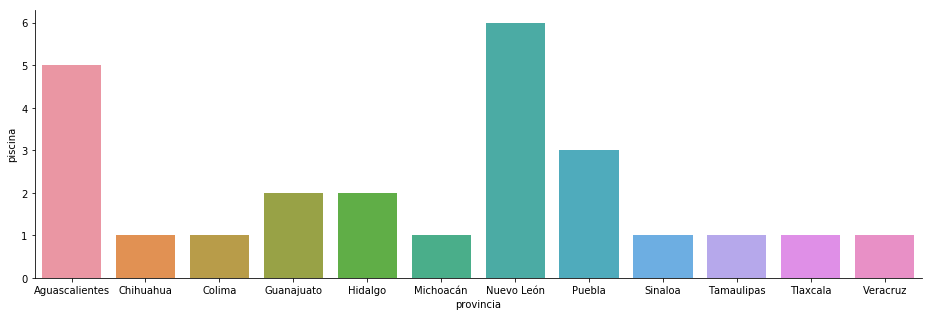

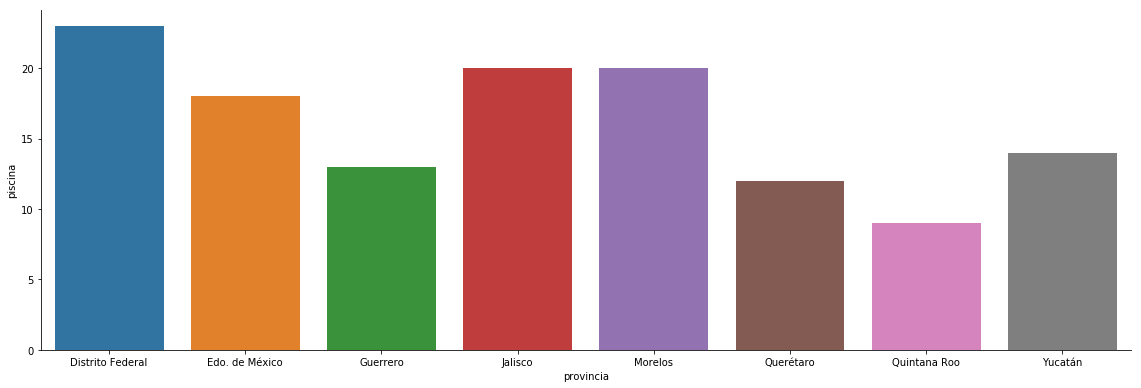

In [129]:
#CANTIDAD DE PISCINAS POR ZONA, EN FORMA ASCENDENTE.
da = df.groupby('provincia').agg({'piscina':'sum'})
da.reset_index(inplace=True)
d0=da[(da['piscina']>0)&(da['piscina']<8)]
d1=da[(da['piscina']>=8)&(da['piscina']<70)]
sns.catplot(x='provincia',y='piscina',kind='bar',
            data=d0,height=4.5, aspect=2.9)
sns.catplot(x='provincia',y='piscina',kind='bar',
            data=d1,height=5.5, aspect=2.9)



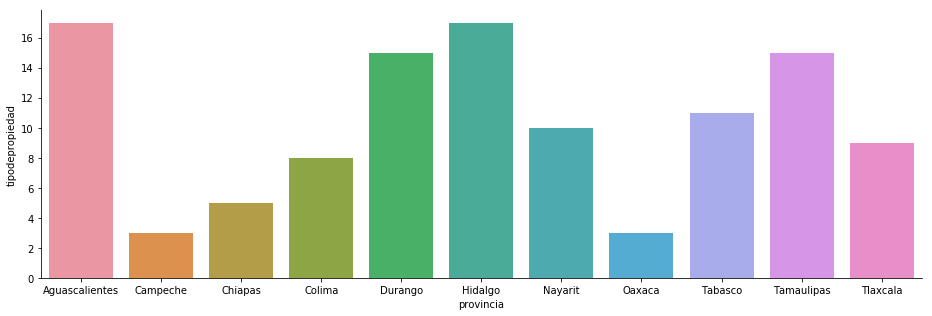

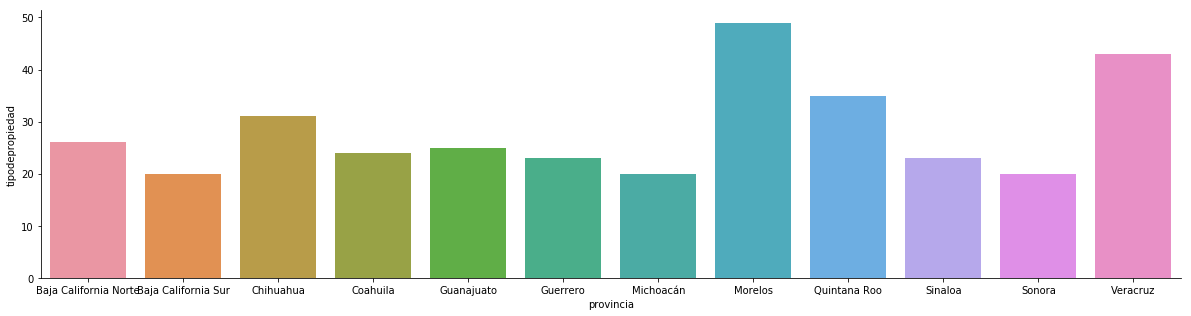

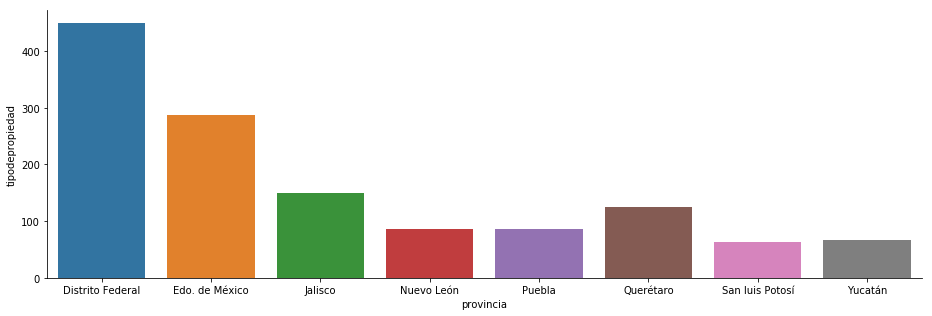

In [135]:
#CANTIDAD DE PROPIEDADES POR ZONA, EN FORMA ASCENDENTE.
da = df.groupby('provincia').agg({'tipodepropiedad':'count'})
da.reset_index(inplace=True)
d0=da[(da['tipodepropiedad']>=0)&(da['tipodepropiedad']<20)]
d1=da[(da['tipodepropiedad']>=20)&(da['tipodepropiedad']<55)]
d2=da[(da['tipodepropiedad']>=55)&(da['tipodepropiedad']<700)]
sns.catplot(x='provincia',y='tipodepropiedad',kind='bar',
            data=d0,height=4.5, aspect=2.9)
sns.catplot(x='provincia',y='tipodepropiedad',kind='bar',
            data=d1,height=4.5, aspect=3.7)
sns.catplot(x='provincia',y='tipodepropiedad',kind='bar',
            data=d2,height=4.5, aspect=2.9)


In [208]:
#PRECIO PROMEDIO DE CIUDAD POR PISCINA.(FILTRADO POR ANIO Y POR TIPO)
filtroPorPropiedad = df['tipodepropiedad'].isin(['Casa'])
filtroPorAnio = df['year'].isin(['2013'])
dfa= df[filtroPorPropiedad&filtroPorAnio]
da = dfa.groupby(['provincia','piscina']).agg({'precio_x':'mean'})
daf=da.apply(lambda x: x['precio_x']/10000,axis=1).unstack()
daf.dropna(inplace=True)
display(daf)

piscina,0.0,1.0
provincia,,
Aguascalientes,100.000000,89.000
Chihuahua,122.708333,69.300
Edo. de México,210.468750,875.000
Jalisco,111.950000,58.525
Querétaro,232.875000,118.500
Yucatán,99.500000,155.000


In [142]:
#CANTIDAD DE ESCUELAS POR ZONA, EN FORMA ASCENDENTE.
da = df.groupby(['provincia']).agg({'escuelascercanas':'sum'})
#NUMERO PUEDE SER DESVIRTUADO POR DOS PROPIEDADES CON LA MISMA ESCUELA CERCANA.REVISAR.
da.reset_index(inplace=True)
display(da)


,provincia,escuelascercanas
0,Aguascalientes,10.0
1,Baja California Norte,11.0
2,Baja California Sur,6.0
3,Campeche,1.0
4,Chiapas,0.0
5,Chihuahua,7.0
6,Coahuila,12.0
7,Colima,3.0
8,Distrito Federal,231.0
9,Durango,5.0
